# Installing and Loading Required Packages

In [ ]:
!pip install sweetviz

In [ ]:
pip install lazypredict

# Note: Restart runtime

In [ ]:
# load packages
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib as mpl
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Data Loading

In [ ]:
# load data files
efficiency = pd.read_excel('/content/drive/MyDrive/602/MIA_Efficiency.xlsx')
ontime = pd.read_excel('/content/drive/MyDrive/602/MIA_Ontime.xlsx')
weather = pd.read_excel('/content/drive/MyDrive/602/MIA_Weather.xlsx') 

In [ ]:
print(efficiency.head())
print(ontime.head())
print(weather.head())

        Date  Hour  ...  ArrivalEfficiency   SAER
0 2019-05-01     0  ...              100.0  100.0
1 2019-05-01     1  ...              100.0  100.0
2 2019-05-01     2  ...              100.0  100.0
3 2019-05-01     3  ...              100.0  100.0
4 2019-05-01     4  ...              100.0  100.0

[5 rows x 20 columns]
        Date  Hour  ...  AverageBlockDelay  AverageGateArrivalDelay
0 2019-05-01     0  ...               0.00                     54.5
1 2019-05-01     1  ...               3.67                     10.0
2 2019-05-01     2  ...               1.00                      0.5
3 2019-05-01     3  ...               0.00                      0.0
4 2019-05-01     4  ...              29.33                     21.5

[5 rows x 17 columns]
        Date  Hour  ...  OperationsSevere  TotalOperations
0 2019-05-01     0  ...                 0              132
1 2019-05-01     1  ...                 0              132
2 2019-05-01     2  ...                 0              132
3 2019-05-

# Data Cleaning

In [ ]:
# Data clean-up and feature engineering
efficiency['Date']= pd.to_datetime(efficiency['Date'])
ontime['Date']= pd.to_datetime(ontime['Date'])
weather['Date']= pd.to_datetime(weather['Date'])

# Merging the data from multiple files to single dataframe
data1 = pd.merge(ontime,weather,on=['Date','Hour'])
data = pd.merge(data1,efficiency,on=['Date','Hour'])

# Creating a single column to show the weather impact
# To make it easy for visulizations
conds = [(data['HourNone'] == 1),(data['HourMinor'] == 1), (data['HourModerate'] == 1), (data['HourSevere'] == 1)]
actions = ['None', 'Minor', 'Moderate', 'Severe']
data['WeatherImpact'] = np.select(conds,actions,default='None')

# Assigning numeric value based on weather impact, to use it in stats model
actions = [0, 1, 2, 3]
data['WeatherCategory'] = np.select(conds,actions,default='None')
data['WeatherCategory'] = data['WeatherCategory'].astype(str).astype(int)

data['DayOfWeek'] = data['Date'].dt.dayofweek
data['DayOfMonth'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month

# Dropping duplicate columns
data = data.drop(['DeparturesForMetricComputation' ,'ArrivalsForMetricComputation' ,'ADRPlusCapcityAAR' ,'FacilityReportedDepartures' ,'FacilityReportedArrivals' 
                  ,'TotalFacilityReported' ,'HourNone' , 'HourMinor', 'HourModerate', 'HourSevere', 'OperationsNone', 'OperationsMinor','OperationsModerate'
                  ,'OperationsSevere'], axis=1)
data.head()

Date  Hour  ScheduledDepartures  ...  DayOfWeek  DayOfMonth  Month
0 2019-05-01     0                    1  ...          2           1      5
1 2019-05-01     1                    3  ...          2           1      5
2 2019-05-01     2                    2  ...          2           1      5
3 2019-05-01     3                    1  ...          2           1      5
4 2019-05-01     4                    2  ...          2           1      5

[5 rows x 36 columns]

In [ ]:
data.describe()

Hour  ScheduledDepartures  ...   DayOfMonth        Month
count  3672.000000          3672.000000  ...  3672.000000  3672.000000
mean     11.500000            18.497549  ...    15.803922     6.993464
std       6.923129            12.779376  ...     8.836707     1.412078
min       0.000000             0.000000  ...     1.000000     5.000000
25%       5.750000             4.000000  ...     8.000000     6.000000
50%      11.500000            18.000000  ...    16.000000     7.000000
75%      17.250000            29.000000  ...    23.000000     8.000000
max      23.000000            44.000000  ...    31.000000     9.000000

[8 rows x 34 columns]

# Data Exploration and Analysis

In [ ]:
# Analyzing the data using Sweetviz
import sweetviz as sv
data_report = sv.analyze(data)
data_report.show_html("data.html")

                                             |          | [  0%]   00:00 -> (? left)

Report data.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


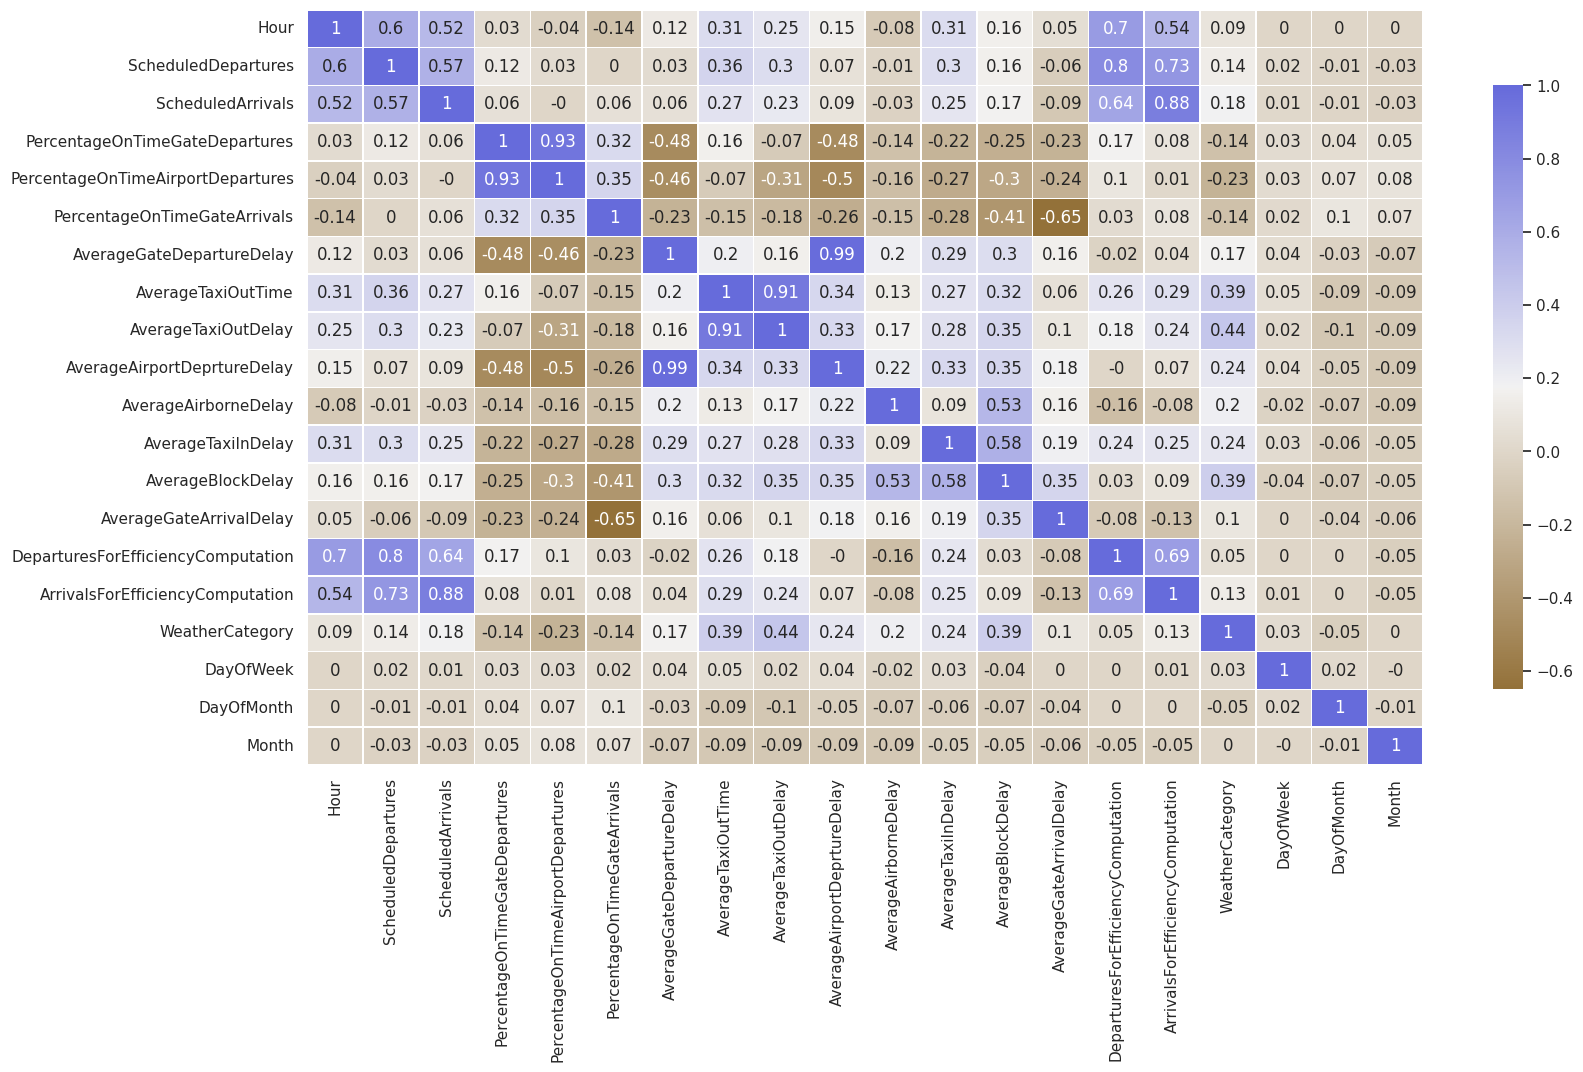

In [ ]:
# High poitive correlation between hour and the number of schedules
# High postive correlation between number of schedules and efficiency
# Positive correlation between delays
# Negetive correlation between Delays and on-time performance

data_corr = data[['Hour', 'ScheduledDepartures', 'ScheduledArrivals','PercentageOnTimeGateDepartures','PercentageOnTimeAirportDepartures','PercentageOnTimeGateArrivals','AverageGateDepartureDelay','AverageTaxiOutTime','AverageTaxiOutDelay','AverageAirportDeprtureDelay','AverageAirborneDelay','AverageTaxiInDelay','AverageBlockDelay','AverageGateArrivalDelay','DeparturesForEfficiencyComputation','ArrivalsForEfficiencyComputation','WeatherCategory','DayOfWeek','DayOfMonth','Month']]
corr = data_corr.corr().round(decimals=2)
mask = np.zeros_like(corr, dtype=np.bool)
sns.set(font_scale=1)
plt.subplots( figsize=(18,10))
cmap = sns.diverging_palette(55,265, as_cmap=True)
sns.heatmap (corr, annot=True,linewidths=.3,cbar_kws={"shrink": .8},cmap=cmap,mask=mask.T)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


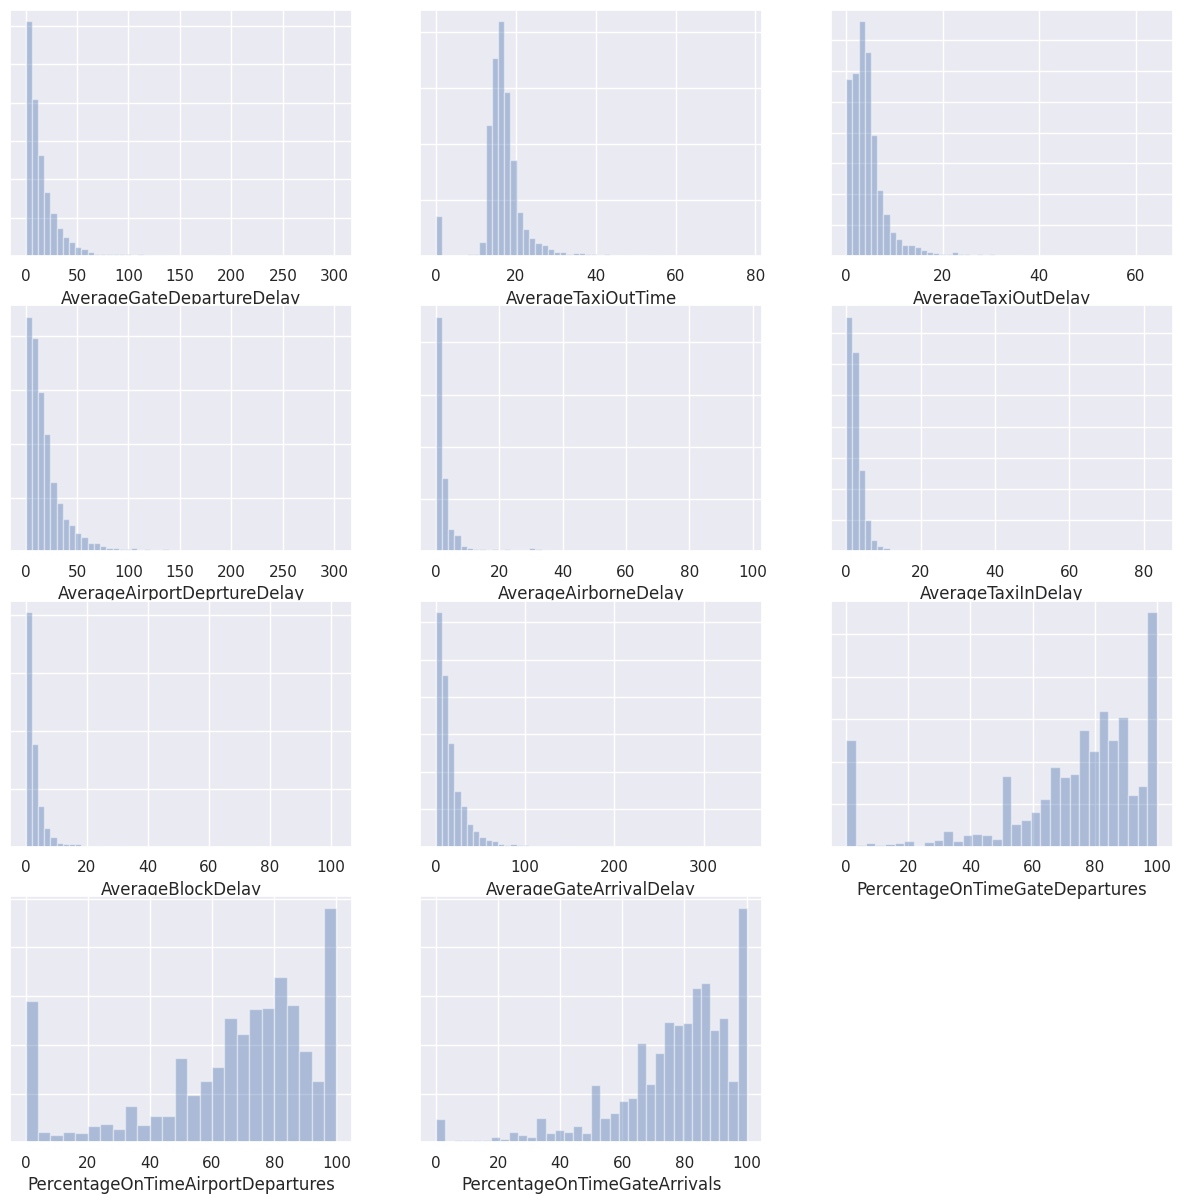

In [ ]:
# plot histograms for on-time performance, departure and arrivals delays
plt.subplots(4,3,figsize=(15,15))

df_delays = data[['AverageGateDepartureDelay', 'AverageTaxiOutTime', 'AverageTaxiOutDelay', 'AverageAirportDeprtureDelay', 'AverageAirborneDelay'
,'AverageTaxiInDelay', 'AverageBlockDelay', 'AverageGateArrivalDelay','PercentageOnTimeGateDepartures','PercentageOnTimeAirportDepartures','PercentageOnTimeGateArrivals']]

for idx, col in enumerate(df_delays.columns):
    ax = plt.subplot(4,3,idx+1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(df_delays[col],kde=False)
    
plt.subplot(4,3,12).set_visible(False)
plt.show()

In [ ]:
# Data at a glance
print("Mean Percent On-Time Airport Departures: ", np.mean(data['PercentageOnTimeAirportDepartures']), '%')
print("Mean Percent On-Time Gate Departures: ", np.mean(data['PercentageOnTimeGateDepartures']), '%')
print("Mean Percent On-Time Gate Arrivals: ", np.mean(data['PercentageOnTimeGateArrivals']), '%')
print("Mean Average Airport Departure Delay: ", np.mean(data['AverageGateDepartureDelay']))
print("Mean Taxi Out Time: ", np.mean(data['AverageTaxiOutTime']))
print("Mean Taxi Out Delay: ", np.mean(data['AverageTaxiOutDelay']))
print("Mean Airport Departure Delay: ", np.mean(data['AverageAirportDeprtureDelay']))
print("Mean Airborne Delay: ", np.mean(data['AverageAirborneDelay']))
print("Mean Taxi In Delay: ", np.mean(data['AverageTaxiInDelay']))
print("Mean Block Delay: ", np.mean(data['AverageBlockDelay']))
print("Mean Gate Arrival Delay: ", np.mean(data['AverageGateArrivalDelay']))

Mean Percent On-Time Airport Departures:  66.80909586056652 %
Mean Percent On-Time Gate Departures:  72.1715849673202 %
Mean Percent On-Time Gate Arrivals:  76.95789488017446 %
Mean Average Airport Departure Delay:  17.26701797385616
Mean Taxi Out Time:  16.879893790849682
Mean Taxi Out Delay:  4.652573529411769
Mean Airport Departure Delay:  20.813270697167706
Mean Airborne Delay:  3.9779711328976015
Mean Taxi In Delay:  2.691279956426997
Mean Block Delay:  3.248899782135071
Mean Gate Arrival Delay:  17.29550381263613


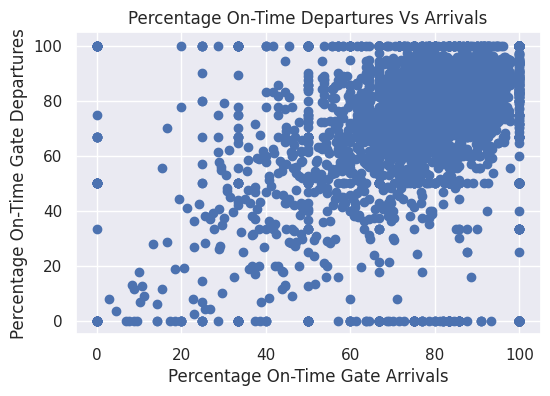

In [ ]:
# On-time departures Vs on-time arrivals
plt.scatter( data['PercentageOnTimeGateArrivals'],data['PercentageOnTimeGateDepartures'])
plt.title('Percentage On-Time Departures Vs Arrivals')
plt.xlabel('Percentage On-Time Gate Arrivals')
plt.ylabel('Percentage On-Time Gate Departures')
plt.show()

# Is taxi-out time a precursor of delay and congestion?

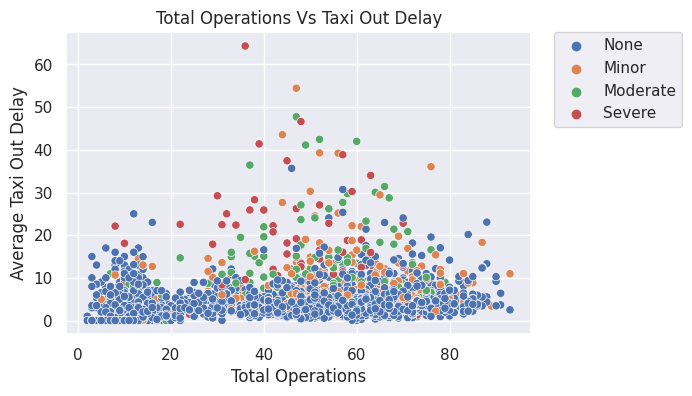

In [ ]:
# This scatter plot allows us to answer "Is taxi-out time a precursor of delay and congestion?"
# Number of flight operations vs Taxi-out delay
# The MIA is handling the operations effectively, which is why there is no strong correlation, even with the increase in the number of flight operations the taxi-out delay is still in control.

sns.scatterplot(data=data, x="TotalForEfficiencyComputation", y="AverageTaxiOutDelay", hue="WeatherImpact")
plt.title('Total Operations Vs Taxi Out Delay')
plt.xlabel('Total Operations')
plt.ylabel('Average Taxi Out Delay')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The MIA is handling the operations effectively, which is why there is no strong correlation, even with the increase in the number of flight operations the taxi-out delay is still in control.

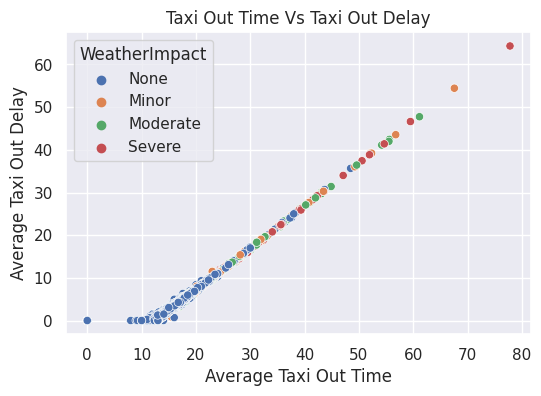

In [ ]:
# Taxi-out time vs taxi-out delay
# Taxi-out delay increasing linearly with taxi out time
sns.scatterplot(data=data, x="AverageTaxiOutTime", y="AverageTaxiOutDelay", hue="WeatherImpact")
plt.title('Taxi Out Time Vs Taxi Out Delay')
plt.xlabel('Average Taxi Out Time')
plt.ylabel('Average Taxi Out Delay')
plt.show()


The average taxi out delay has increased significantly as a result of increased taxi times and above plot shows that taxi-out delay increases linearly with taxi out time.

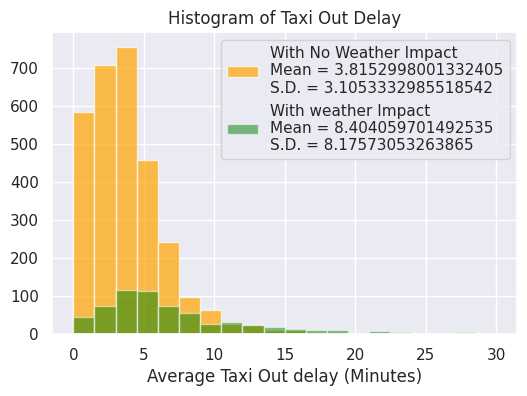

In [ ]:
# The average taxi-out delays when there is no impact of weather is 3.18 minutes 
# When there is weather impact (Minor, Moderate, Severe), it is 8.17 minutes. 
data_none = (data[data['WeatherImpact']=='None'])[['Date','AverageTaxiOutDelay']]
data_impact = (data[data['WeatherImpact']!='None'])[['Date','AverageTaxiOutDelay']]

none_avg = data_none["AverageTaxiOutDelay"].mean()
impact_avg = data_impact["AverageTaxiOutDelay"].mean()
none_std = data_none["AverageTaxiOutDelay"].std()
impact_std = data_impact["AverageTaxiOutDelay"].std()

bin_num = 20
bin_max = 30.
bin_min = 0.
bin_range = (bin_max - bin_min) / bin_num

data_none["AverageTaxiOutDelay"].hist(bins = bin_num, range = (bin_min, bin_max), alpha = 0.7, color = "orange")
data_impact["AverageTaxiOutDelay"].hist(bins = bin_num, range = (bin_min, bin_max), alpha = 0.5, color = "green")
plt.xlabel('Average Taxi Out delay (Minutes)')
plt.title('Histogram of Taxi Out Delay')
plt.legend(['With No Weather Impact\nMean = {}\nS.D. = {}'.format(none_avg,none_std),'With weather Impact\nMean = {}\nS.D. = {}'.format(impact_avg,impact_std)],loc = 'upper right')

Delays can happend even when weather is good. The average taxi-out delays when there is no impact of weather is 3.18 minutes and when there is weather impact (Minor, Moderate, Severe), it is 8.17 minutes. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


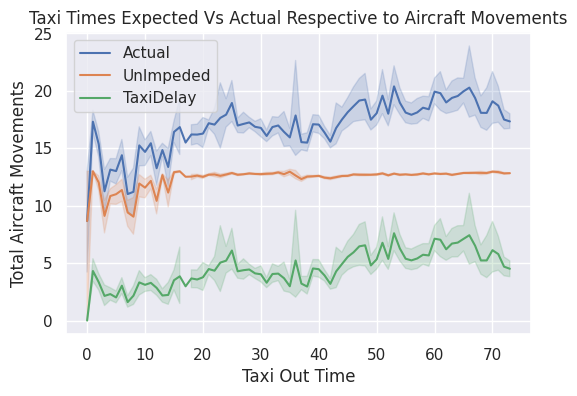

In [ ]:
# Unimpeded Taxi-Out Time is the expected taxiout time (difference between taxi-out time and delay)
data['UnimpededTaxiOutTime'] = data['AverageTaxiOutTime'] - data['AverageTaxiOutDelay']
data['TotalAircraftMovements'] = data['ScheduledArrivals'] + data['ScheduledDepartures']

  
sns.lineplot( data['TotalAircraftMovements'],data['AverageTaxiOutTime'],label='Actual')
sns.lineplot( data['TotalAircraftMovements'],data['UnimpededTaxiOutTime'],label='UnImpeded')
sns.lineplot( data['TotalAircraftMovements'],data['AverageTaxiOutDelay'],label='TaxiDelay')

plt.title('Taxi Times Expected Vs Actual Respective to Aircraft Movements')
plt.xlabel('Taxi Out Time')
plt.ylabel('Total Aircraft Movements')
plt.show()

The expected average taxi-out time is constant after reaching certain number of flight operations, which in this case we can see that nearly after 13, it is almost constant. But the because of delay the actual taxi-out time has increased with the number of flight operations

# Does Delay happen at all times of the day?

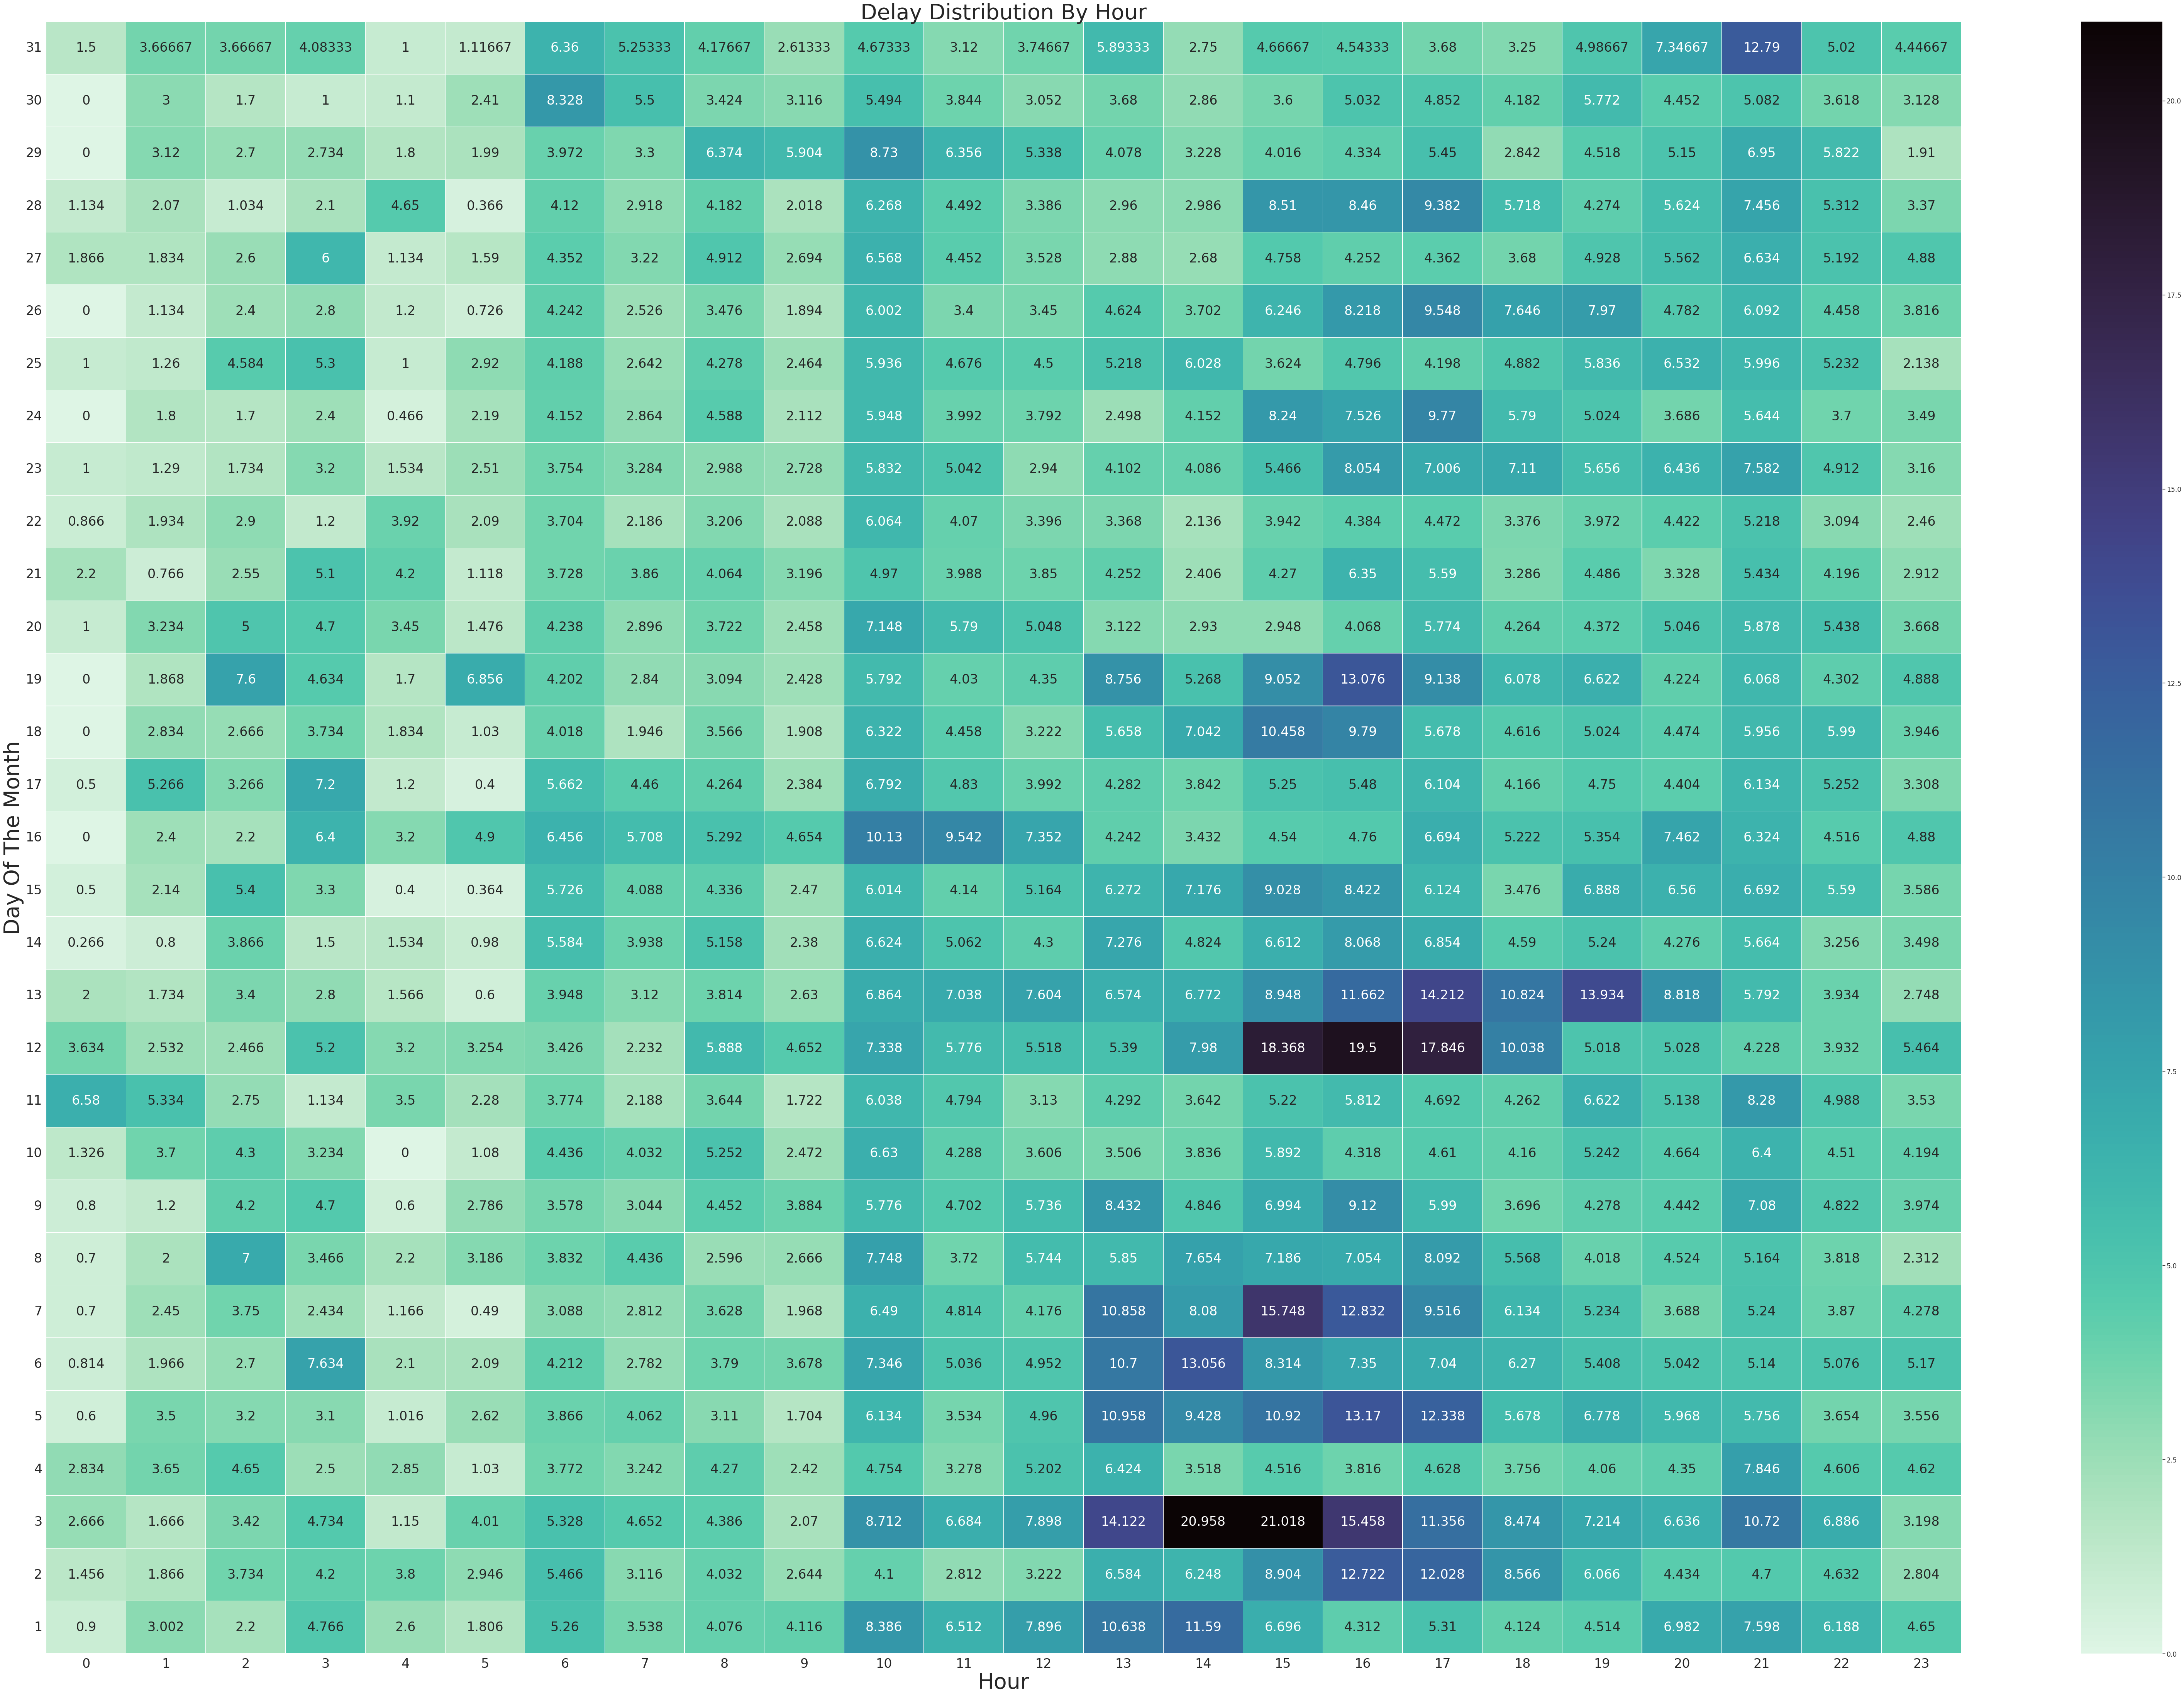

In [ ]:
# Delay distribution by hour
fig = plt.figure(num=None, figsize=(100, 70), dpi=80)
sns.set(font_scale=1.4)

data_hour = data.groupby(['DayOfMonth','Hour'], as_index=False)['AverageTaxiOutDelay'].mean()
data_hour.columns=['DayOfMonth','Hour','AverageTaxiOutDelay']
data_hour_pt = data_hour.pivot('DayOfMonth','Hour','AverageTaxiOutDelay')

res = sns.heatmap(data=data_hour_pt, annot=True, fmt="g", linewidths=.2, cmap="mako_r",  annot_kws={"size": 30})
res.invert_yaxis()

res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 30)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 30, rotation=360)


plt.title("Delay Distribution By Hour",size=50)
plt.xlabel("Hour",size=50)
plt.ylabel("Day Of The Month",size=50)
plt.show()

Text(0, 0.5, 'Percentage of On-time Departures')

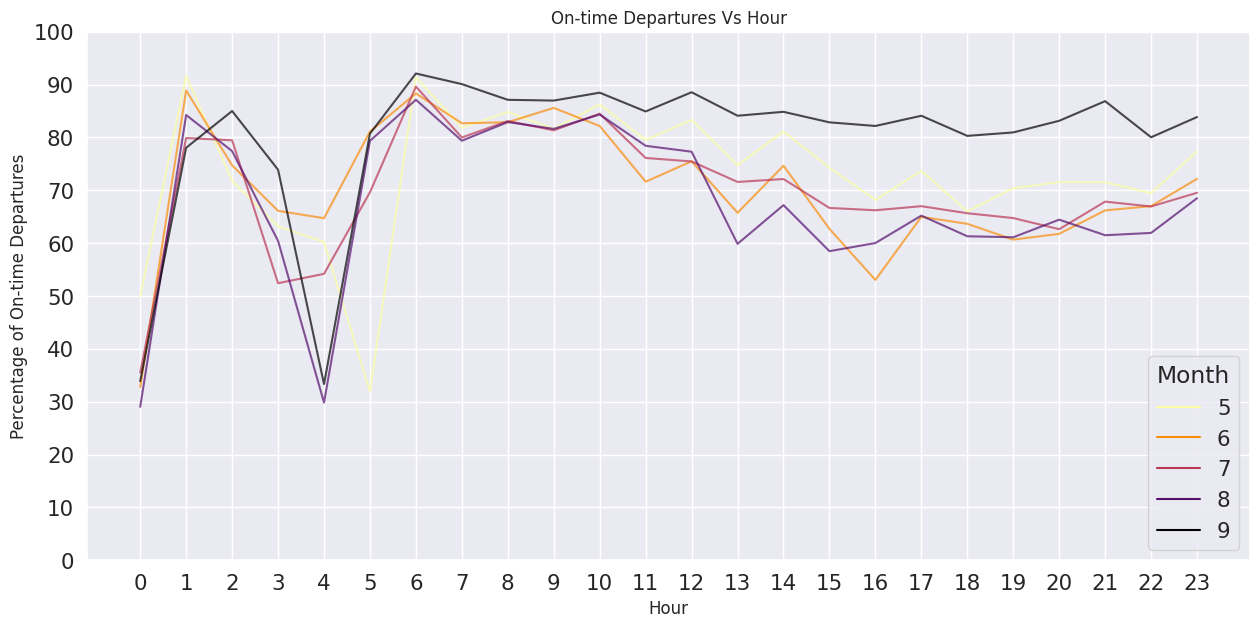

In [ ]:
# on-time departure performance by hour 
hourly_departures = data.groupby(['Month','Hour'], as_index=False)['PercentageOnTimeGateDepartures'].mean()
hourly_departures.columns=['Month','Hour','PercentageOnTimeGateDepartures']

fig = plt.figure(figsize = (15, 7))

ax1 = sns.lineplot(x='Hour',y='PercentageOnTimeGateDepartures',hue='Month',
                palette="inferno_r",
            data=hourly_departures,alpha=0.7)
ax1.xaxis.set_ticks(np.arange(0, 24, 1))
ax1.yaxis.set_ticks(np.arange(0, 110, 10))

plt.title("On-time Departures Vs Hour",size=12)
plt.xlabel("Hour",size=12)
plt.ylabel("Percentage of On-time Departures",size=12)

The on-time departure rate has two peak-hour durations: at 1:00 AM–2:00 AM and 5:00 AM–9:00 AM. On-time departure rates are dropping starting from 4:00 PM and continued to dip down till next day 1:00 AM, and again from 3:00AM to 4:00AM is another duration. The low on-time departures hour duration is observed from about 4:00 PM to 7:00 PM.

In [ ]:
data.groupby(['Hour'], as_index=False)['PercentageOnTimeGateArrivals'].mean()

Hour  PercentageOnTimeGateArrivals
0      0                     63.699216
1      1                     82.015948
2      2                     74.029281
3      3                     70.272484
4      4                     86.449346
5      5                     79.294314
6      6                     75.272222
7      7                     84.828627
8      8                     86.596209
9      9                     90.545621
10    10                     85.746405
11    11                     85.014902
12    12                     80.689739
13    13                     81.152745
14    14                     78.190000
15    15                     75.749477
16    16                     76.715621
17    17                     73.956601
18    18                     69.931503
19    19                     75.428758
20    20                     67.224052
21    21                     69.035098
22    22                     68.864444
23    23                     66.286863

On-time arrivals rates are relatively high compared to departure rates. But the trend observed is like the departure rates. On-time arrival rates starting to drop after 9:00 AM.

# Does MIA have enough capacity available to ensure continued operations?

In [ ]:
# Preparing the data for box plot
df1 = pd.DataFrame(columns = ['NumberOfOperations', 'Label', 'ArrivalOrDeparture'])
df1['NumberOfOperations'] = data['DeparturesForEfficiencyComputation']
df1['Label'] = 'DeparturesForEfficiencyComputation'
df1['ArrivalOrDeparture'] = 'Departure'
df2 = pd.DataFrame(columns = ['NumberOfOperations', 'Label', 'ArrivalOrDeparture'])
df2['NumberOfOperations'] = data['EfficiencyADR']
df2['Label'] = 'EfficiencyADR'
df2['ArrivalOrDeparture'] = 'Departure'
df3 = pd.DataFrame(columns = ['NumberOfOperations', 'Label', 'ArrivalOrDeparture'])
df3['NumberOfOperations'] = data['ArrivalsForEfficiencyComputation']
df3['Label'] = 'ArrivalsForEfficiencyComputation'
df3['ArrivalOrDeparture'] = 'Arrival'
df4 = pd.DataFrame(columns = ['NumberOfOperations', 'Label', 'ArrivalOrDeparture'])
df4['NumberOfOperations'] = data['EfficiencyAAR']
df4['Label'] = 'EfficiencyAAR'
df4['ArrivalOrDeparture'] = 'Arrival'
efficiency_comparison = pd.DataFrame(columns = ['NumberOfOperations', 'Label', 'ArrivalOrDeparture'])
efficiency_comparison = df1.append(df2)
efficiency_comparison = efficiency_comparison.append(df3)
efficiency_comparison = efficiency_comparison.append(df4)
efficiency_comparison.head()

NumberOfOperations                               Label ArrivalOrDeparture
0                   7  DeparturesForEfficiencyComputation          Departure
1                   3  DeparturesForEfficiencyComputation          Departure
2                   6  DeparturesForEfficiencyComputation          Departure
3                   3  DeparturesForEfficiencyComputation          Departure
4                   8  DeparturesForEfficiencyComputation          Departure

In [ ]:
from scipy.stats import ttest_ind

def t_test (dataset_1):
    
    p_value_dict = {}
    for status in dataset_1['ArrivalOrDeparture'].unique():
        #import ipdb;ipdb.set_trace()
        list_label=  dataset_1[dataset_1['ArrivalOrDeparture']==status]["Label"].unique()
        
        # set prob to an empty string to clear out the memory.
        prob = ""

        t_stat, p_value = ttest_ind(dataset_1[dataset_1['Label']==list_label[0]][["NumberOfOperations"]], dataset_1[dataset_1['Label']==list_label[1]][["NumberOfOperations"]])
        if p_value>0.05:
            prob = "ns"
        if p_value<= 0.05:
            prob = "*"
        if p_value <= 0.01:
            prob = "**"
        if p_value <= 0.001:
            prob = "***"
        if p_value <= 0.0001:
            prob = "****"
        p_value_dict[status] = prob
        
    return(p_value_dict)

In [ ]:
def compare_means(dataset_1):
    ''' This is a function that compares population means and generates boxplots of any two columns'''
    # call t-test function which returns a dictionary of strain gauges as keys and np, *, **, *** as values
    p_value_dict =  t_test(dataset_1)
    # Box Plots
    fig, ax = plt.subplots(figsize=(11.7,12))
    plt.ylim(0,100)
    sns.boxplot(y='NumberOfOperations', x='ArrivalOrDeparture', hue='Label', showmeans = True,medianprops=dict(color="red", alpha=0.7),
            data = efficiency_comparison, showfliers = False, meanprops={"marker":"o","markerfacecolor":"black", "markeredgecolor":"black"})
    plt.legend(loc='upper left')
    
    plt.text(-0.3, 75, p_value_dict["Departure"], ha='center', va='bottom')
    plt.text(1.2, 75, p_value_dict["Arrival"], ha='center', va='bottom')
#     plt.text(2, 700, p_value_dict["FSG-3"], ha='center', va='bottom')
#     plt.text(3, 700, p_value_dict["FSG-4"], ha='center', va='bottom')
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    plt.text(0.83, 81, "Significance Levels \n ns    p > 0.05 \n *      p <= 0.05 \n **    p <= 0.01 \n ***   p <= 0.001 \n ****  p <= 0.0001", horizontalalignment='left', size='large', color='black', weight='bold',bbox=props)
    plt.savefig('NAPTF vs EWR_4R')

    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

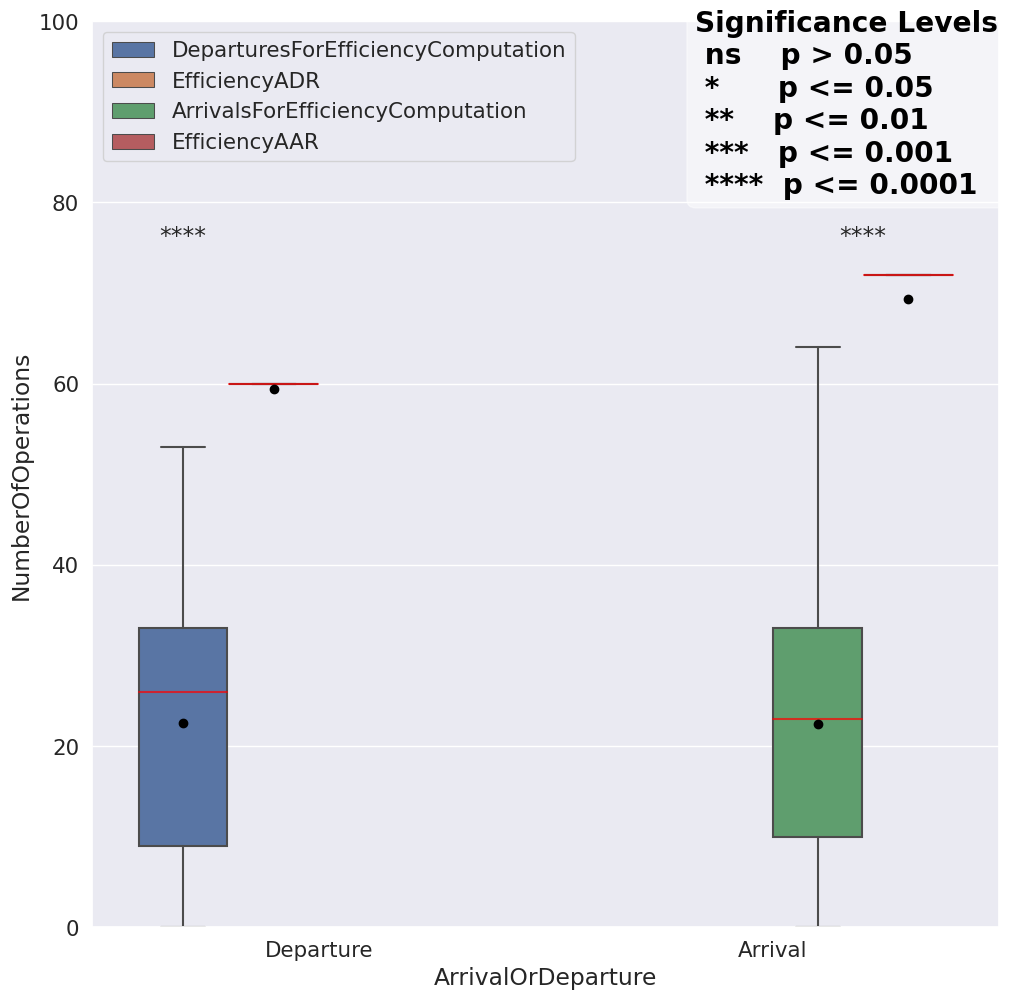

In [ ]:
compare_means(efficiency_comparison)

MIA will face no issues to continue operations given the dataset for both arrivals and departures. There has been no incident in the dataset where the demand has exceeded the capacity. 

# F-statistic: understanding model significance
This is a test of significance. It is a method of reaching a conclusion to either reject or accept certain claims based on the data. In the case of regression analysis, it is used to determine whether an independent variable is significant in explaining the variance of the dependent variable. 

The null hypothesis H0 would be: β1= β2 = … = βn = 0 
Meaning coefficients of all independent variables are zero

Alternative hypothesis H1 would be: βi ≠ 0


In [ ]:
import statsmodels.api as sm
X = data[['Hour','ScheduledDepartures', 'ScheduledArrivals','WeatherCategory','DayOfWeek','AverageTaxiOutTime']]
Y = data['PercentageOnTimeGateDepartures']

# Build the model and define 'predictions' 
est = sm.OLS(Y, X)
# Fit the model
model = est.fit()

predictions = model.predict(X)

# Print out the statistics 
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                      
===================================================================================================
Dep. Variable:     PercentageOnTimeGateDepartures   R-squared (uncentered):                   0.851
Model:                                        OLS   Adj. R-squared (uncentered):              0.850
Method:                             Least Squares   F-statistic:                              3480.
Date:                            Wed, 08 Dec 2021   Prob (F-statistic):                        0.00
Time:                                    21:21:35   Log-Likelihood:                         -17663.
No. Observations:                            3672   AIC:                                  3.534e+04
Df Residuals:                                3666   BIC:                                  3.537e+04
Df Model:                                       6                                                  
Covariance Type:                        nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Hour                    0.0042      0.092      0.046      0.963      -0.176       0.185
ScheduledDepartures     0.1524      0.053      2.880      0.004       0.049       0.256
ScheduledArrivals       0.3275      0.052      6.240      0.000       0.225       0.430
WeatherCategory       -15.2911      0.787    -19.418      0.000     -16.835     -13.747
DayOfWeek               3.4010      0.226     15.072      0.000       2.959       3.843
AverageTaxiOutTime      3.1402      0.070     44.824      0.000       3.003       3.278
==============================================================================
Omnibus:                      495.580   Durbin-Watson:                   1.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              931.018
Skew:                          -0.858   Prob(JB):                    6.79e-203
Kurtosis:                       4.772   Cond. No.                         58.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# F - test, p value is 0, rejects NULL hypothesis 
A = np.identity(len(model.params))
A = A[1:,:]
print(model.f_test(A))

<F test: F=array([[959.36578838]]), p=0.0, df_denom=3.67e+03, df_num=5>


The results of F-test show that the given model got an F-statistic score of 959.36. It also displays the two degrees of freedom: df1 = 5 and df2 = 3670. Based on f-distribution (F-distribution tables) table for the alpha value of 0.05 the f-critical value is 2.2141  which is much lower than our F-statistic score of 959.36. We reject the null hypothesis because F-statistic > F-critical, which suggests that the independent factors are jointly significant in explaining the variance of the dependent variable.

# Principal Component Analysis

In [ ]:
# loading packages
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# considering the delay related metrics and schedules for PCA
X = data[['AverageGateDepartureDelay', 'AverageTaxiOutDelay', 'AverageAirportDeprtureDelay', 'AverageAirborneDelay', 'AverageTaxiInDelay','AverageGateArrivalDelay', 'AverageBlockDelay', 'ScheduledDepartures', 'ScheduledArrivals','DeparturesForEfficiencyComputation', 'ArrivalsForEfficiencyComputation']]
# standardizing the data
sc = StandardScaler()
sc.fit(X)
X_train = sc.transform(X)
X_train = pd.DataFrame(X_train, columns = X.columns)

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
explained_variance = pca.explained_variance_ratio_
cummulative_explained_variance = np.cumsum(explained_variance)

In [ ]:
Y = pd.DataFrame(X_train_pca, columns = ['PC{}'.format(str(i)) for i in range(1,12)])
Y['Hour'] = data['Hour']

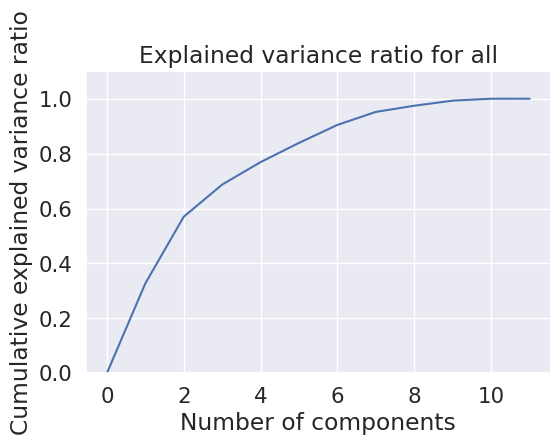

In [ ]:
# Function for plotting cumulative variance
# First 4 principal components are accountable for nearly 77% of the variance in the dataset
def plot_cumulative(x, title=None):
    cumsum = list(np.cumsum(x))
    cumsum.insert(0,0)
    plt.plot(cumsum);
    plt.title("Explained variance ratio for "+title);
    plt.xlabel("Number of components");
    plt.ylabel("Cumulative explained variance ratio");
    plt.ylim(0,1.1);
    
plot_cumulative(pca.explained_variance_ratio_, "all")

In [ ]:
print("Variance Explained",explained_variance) 
print("Cumulative Variance Explained",cummulative_explained_variance)

Variance Explained [3.27049640e-01 2.43086510e-01 1.17024489e-01 8.19167880e-02
 7.00426371e-02 6.54645723e-02 4.73748246e-02 2.24650662e-02
 1.85629678e-02 6.96178255e-03 5.07224905e-05]
Cumulative Variance Explained [0.32704964 0.57013615 0.68716064 0.76907743 0.83912006 0.90458464
 0.95195946 0.97442453 0.99298749 0.99994928 1.        ]


From the cumulative explained variance curve and plot of eigenvalues as shown in figure 8 it is seen that the first 4 principal components are accountable for nearly 77% of the variance in the dataset. 

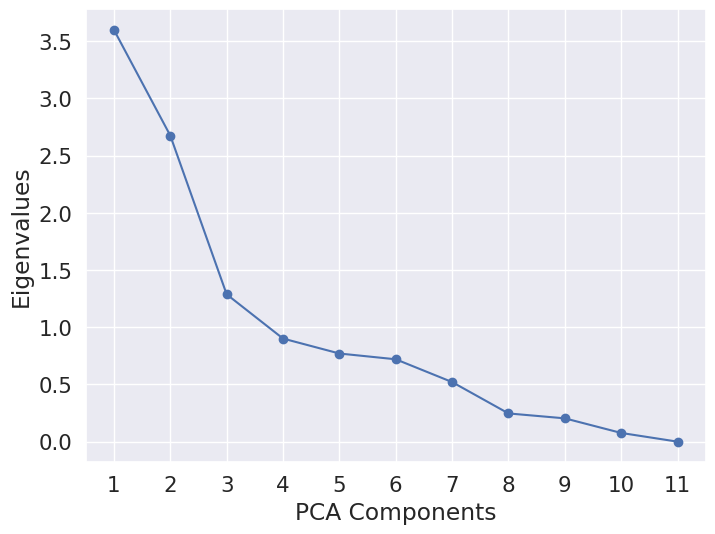

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(range(1,12), pca.explained_variance_, "-o")
plt.xticks(range(1,12))
plt.ylabel("Eigenvalues")
plt.xlabel("PCA Components")
plt.show()


In [ ]:
# Distribution of principal components
eigenvectors = pd.DataFrame(pca.components_, columns = ['AverageGateDepartureDelay', 'AverageTaxiOutDelay', 'AverageAirportDeprtureDelay', 'AverageAirborneDelay', 'AverageTaxiInDelay','AverageGateArrivalDelay', 'AverageBlock  Delay', 'ScheduledDepartures', 'ScheduledArrivals','DeparturesForEfficiencyComputation', 'ArrivalsForEfficiencyComputation'])
eigenvectors

AverageGateDepartureDelay  ...  ArrivalsForEfficiencyComputation
0                    0.192812  ...                          0.428845
1                    0.422592  ...                         -0.264300
2                    0.535040  ...                          0.054501
3                    0.004832  ...                         -0.073573
4                   -0.149018  ...                         -0.141830
5                   -0.033298  ...                         -0.072371
6                   -0.058890  ...                          0.327675
7                    0.029162  ...                         -0.181008
8                   -0.009357  ...                         -0.351201
9                    0.003026  ...                         -0.670092
10                   0.685724  ...                         -0.000041

[11 rows x 11 columns]

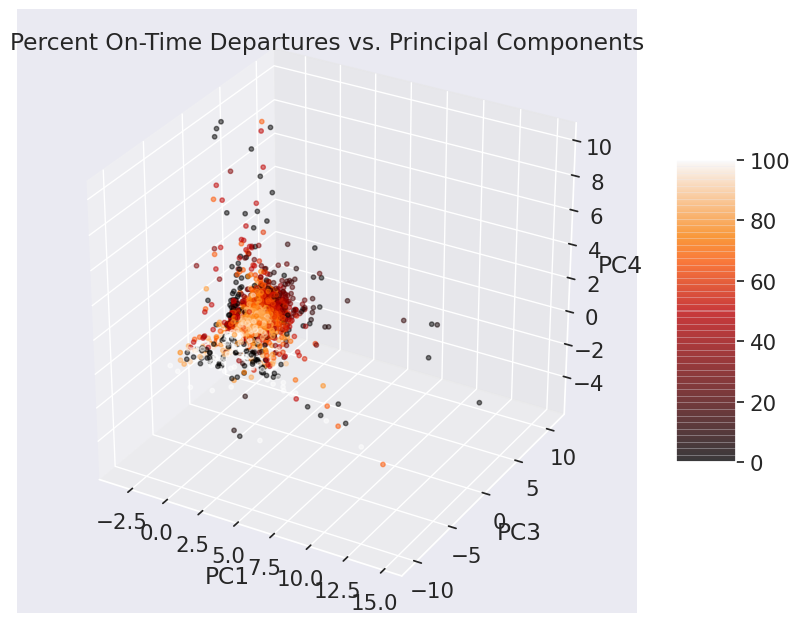

In [ ]:
# plot against percent on-time departures
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(
    Y['PC1'], Y['PC3'], Y['PC4'], 
    zdir='x', s = 10, c = data['PercentageOnTimeAirportDepartures'], 
    cmap = 'gist_heat', depthshade=True, alpha=0.5)
ax.set_xlabel("PC1")
ax.set_ylabel("PC3")
ax.set_zlabel("PC4")
ax.set_title("Percent On-Time Departures vs. Principal Components")
fig.colorbar(p, shrink=0.5, aspect=5)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
  km_pca = KMeans(n_clusters=i,init='k-means++', random_state=42)
  km_pca.fit(X_train_pca)
  wcss.append(km_pca.inertia_)

Text(0.5, 1.0, 'K-Means With PCA Clustering')

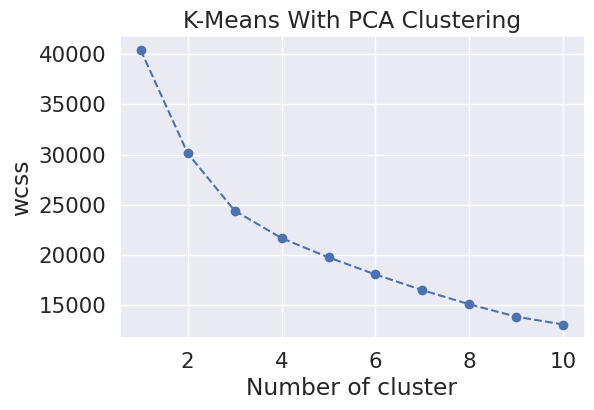

In [ ]:
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.xlabel("Number of cluster")
plt.ylabel("wcss")
plt.title("K-Means With PCA Clustering")

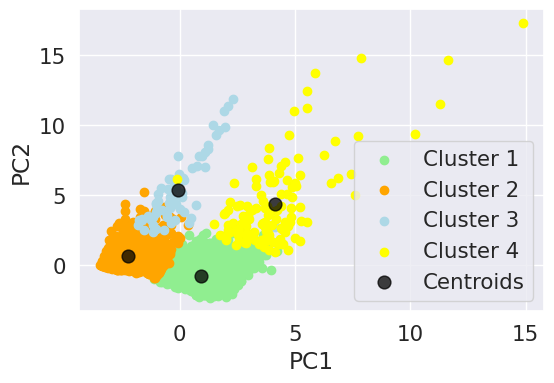

In [ ]:
km = KMeans(n_clusters=4,
           init='k-means++',
           random_state=0)

y_km = km.fit_predict(X_train_pca)

plt.scatter(X_train_pca[y_km==0, 0], X_train_pca[y_km==0, 1], c='lightgreen', label='Cluster 1')
plt.scatter(X_train_pca[y_km==1, 0], X_train_pca[y_km==1, 1], c='orange', label='Cluster 2')
plt.scatter(X_train_pca[y_km==2, 0], X_train_pca[y_km==2, 1], c='lightblue', label='Cluster 3')
plt.scatter(X_train_pca[y_km==3, 0], X_train_pca[y_km==3, 1], c='yellow', label='Cluster 4')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=85, alpha=0.75, marker='o', c='black', label='Centroids')

plt.legend(loc='best')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Lazy Prediction

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# creating label based on delay
data['label']=data['AverageTaxiOutDelay'].apply(lambda x:1 if x > 1.0 else 0)
X = data[['Hour', 'ScheduledDepartures', 'ScheduledArrivals','WeatherCategory','DayOfWeek']]
y = data['label']

# split the data for training and testing 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state =1585)
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)
# fit and run predictions
clfmodels,clfpredictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:02<00:00, 12.91it/s]


In [ ]:
# lazy classification results
# Based on the accuracy we have considered Random Forest and LightGBM as final classification models. 
results_class = pd.DataFrame(clfmodels)
results_class

Accuracy  ...  Time Taken
Model                                    ...            
GaussianNB                         0.87  ...        0.02
NearestCentroid                    0.84  ...        0.02
QuadraticDiscriminantAnalysis      0.86  ...        0.02
BernoulliNB                        0.85  ...        0.01
LinearDiscriminantAnalysis         0.87  ...        0.02
LGBMClassifier                     0.90  ...        0.10
ExtraTreeClassifier                0.89  ...        0.02
RandomForestClassifier             0.90  ...        0.28
ExtraTreesClassifier               0.89  ...        0.23
DecisionTreeClassifier             0.88  ...        0.02
XGBClassifier                      0.90  ...        0.23
LogisticRegression                 0.89  ...        0.04
BaggingClassifier                  0.89  ...        0.05
KNeighborsClassifier               0.90  ...        0.05
AdaBoostClassifier                 0.90  ...        0.16
LinearSVC                          0.89  ...        0.04
CalibratedClassifierCV             0.89  ...        0.14
SVC                                0.89  ...        0.17
SGDClassifier                      0.88  ...        0.03
DummyClassifier                    0.76  ...        0.01
Perceptron                         0.87  ...        0.02
RidgeClassifier                    0.87  ...        0.03
RidgeClassifierCV                  0.87  ...        0.03
PassiveAggressiveClassifier        0.84  ...        0.03

[24 rows x 5 columns]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Random Forest Classifier
rf_clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))

Accuracy: 0.8974591651542649


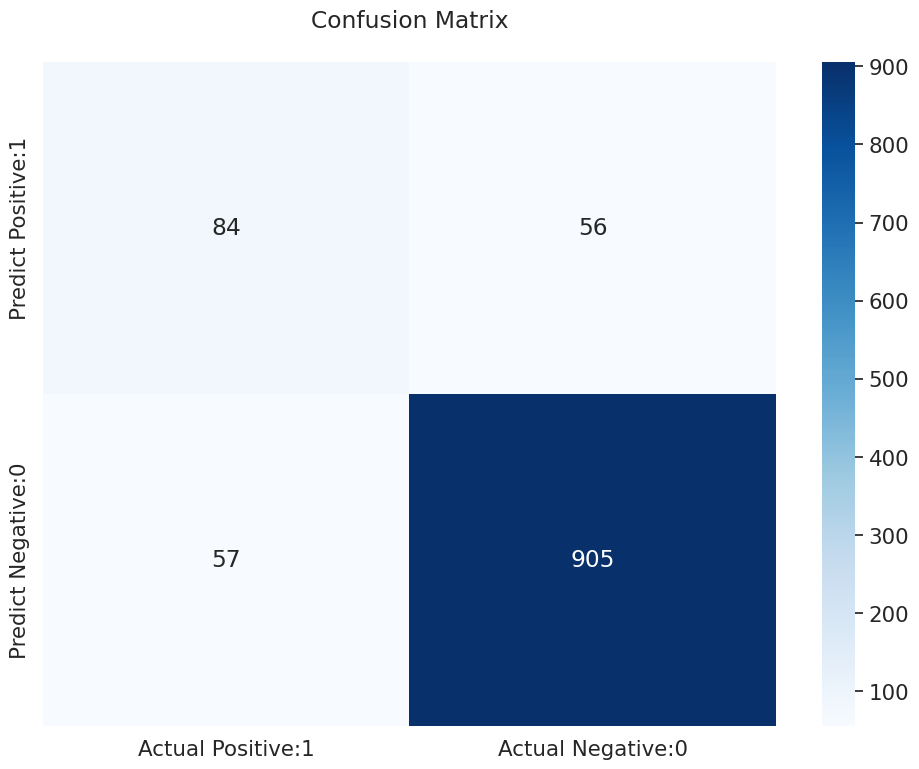

In [ ]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(figsize=(10,8))
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_matrix_rf = pd.DataFrame(data=cm_rf, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix\n")
plt.tight_layout()

In [ ]:
from lightgbm import LGBMClassifier
# define the model
lgb_clf = LGBMClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
lgb_clf.fit(X_train, y_train)

y_pred_lgb = lgb_clf.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lgb))

Accuracy: 0.9047186932849365


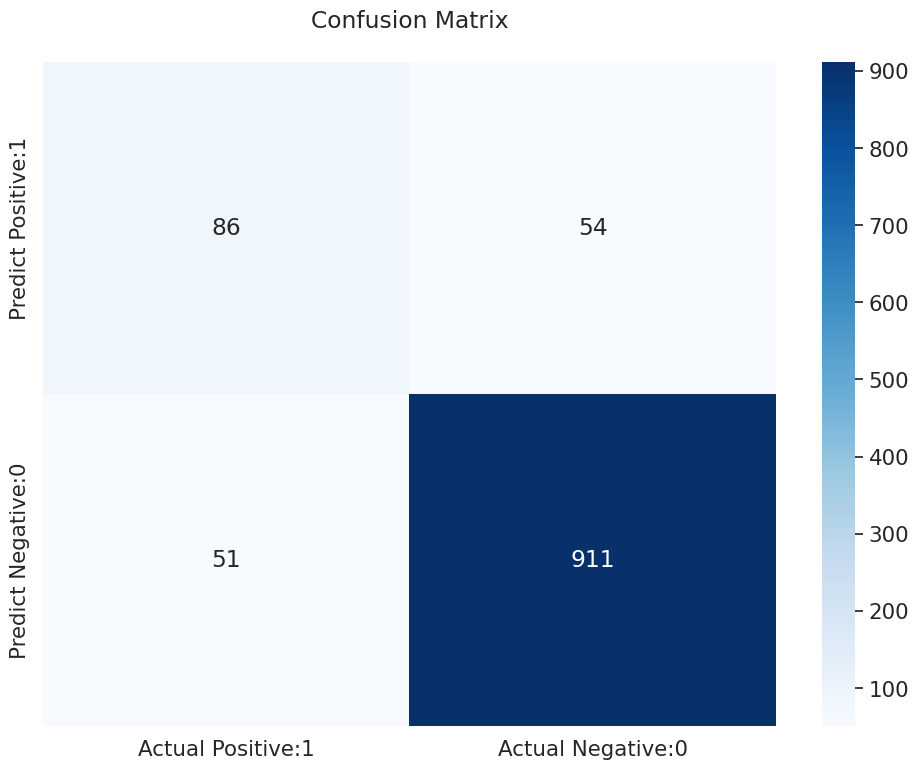

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
cm_matrix_lgb = pd.DataFrame(data=cm_lgb, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_lgb, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix\n")
plt.tight_layout()